# Problem Set 3
### Zhaoyang Chen

In [11]:
import numpy as np
import pandas as mp
import scipy.optimize as opt
import scipy.interpolate as intpl

import matplotlib.pyplot as plt
%matplotlib notebook

## Question 1

### a

In [2]:
# Set up the parameters
beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)
V_t = np.log(W_vec)

def utility_CRRA(W, W_pr, gamma):
    # Define CRRA utility function
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    return util

eps_size = eps_vec.shape[0]
eps_vec = np.array([-1.40, -0.55,0.00,0.55,1.4])
eps_prob = np.array([0.1,0.2,0.4,0.2,0.1])

def neg_V_iid(W_pr, *args):
    W_init, eps, util, EXP_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps) * util(W, W_pr, gamma) + beta * EXP_V_t_interp(W_pr)
    neg_Vtp1 = -Vtp1
    return neg_Vtp1

In [3]:
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    psi_vec = np.zeros((W_size, eps_size))
    V_new = np.zeros((W_size, eps_size))

    # Intergrate out eps_pr from V_init
    Exp_V = V_init @ eps_prob.reshape((eps_size, 1))
    
    # Interpolate ? value function
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')
    
    for eps_ind in range(eps_size):
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, utility_CRRA, Exp_V_interp, gamma, beta)
            results_all = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results_all.fun
            psi_vec[W_ind, eps_ind] = results_all.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 3288.97756021794
VF_iter= 3 , VF_dist= 4368.033199294506
VF_iter= 4 , VF_dist= 5171.123172733097
VF_iter= 5 , VF_dist= 5690.816865389138
VF_iter= 6 , VF_dist= 5962.334129328163
VF_iter= 7 , VF_dist= 6029.410863441402
VF_iter= 8 , VF_dist= 5938.006359170565
VF_iter= 9 , VF_dist= 5728.733568262047
VF_iter= 10 , VF_dist= 5436.089591828782
VF_iter= 11 , VF_dist= 5088.450567375281
VF_iter= 12 , VF_dist= 4708.595711208242
VF_iter= 13 , VF_dist= 4314.425870978331
VF_iter= 14 , VF_dist= 3919.65298650865
VF_iter= 15 , VF_dist= 3534.4538903399794
VF_iter= 16 , VF_dist= 3166.071779909345
VF_iter= 17 , VF_dist= 2819.3724059117126
VF_iter= 18 , VF_dist= 2497.3313722144717
VF_iter= 19 , VF_dist= 2201.455762547464
VF_iter= 20 , VF_dist= 1932.1399178953084
VF_iter= 21 , VF_dist= 1688.9596638065323
VF_iter= 22 , VF_dist= 1470.910871915739
VF_iter= 23 , VF_dist= 1276.5993702276699
VF_iter= 24 , VF_dist= 1104.3893159738761
VF_iter= 25 , VF_dis

### b

<IPython.core.display.Javascript object>


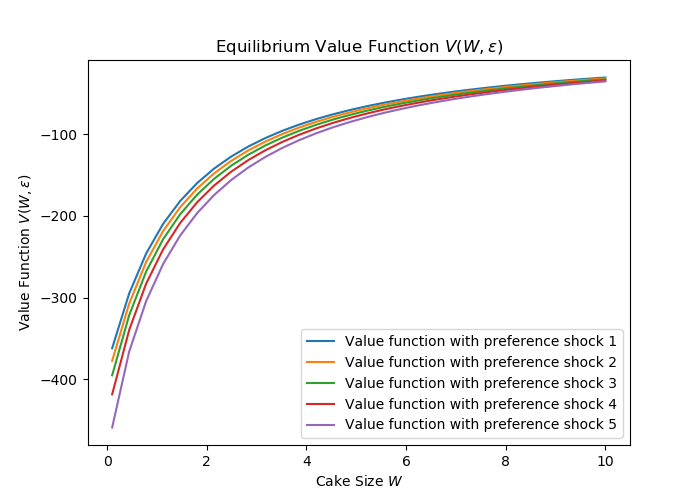

In [15]:
plt.figure(figsize=(7,5))
for i in range(5):
    plt.plot(W_vec, V_new[:,i], label='Value function with preference shock {}'.format(i+1))
plt.title('Equilibrium Value Function $V(W, \epsilon)$')
plt.xlabel('Cake Size $W$')
plt.ylabel('Value Function $V(W, \epsilon)$')
plt.legend()

<IPython.core.display.Javascript object>


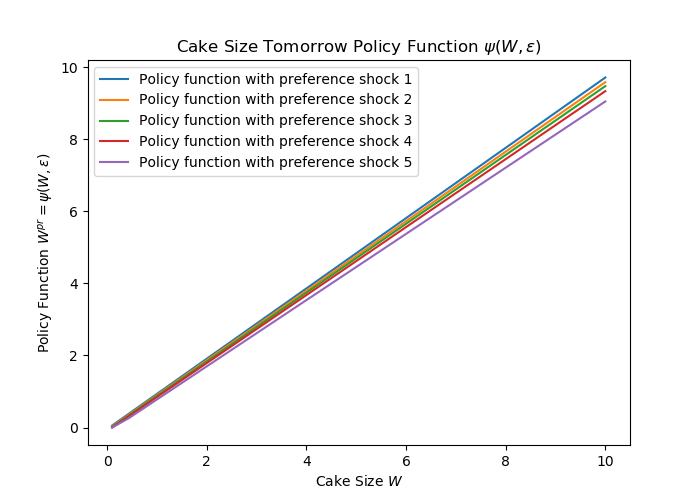

In [14]:
plt.figure(figsize=(7,5))
for i in range(5):
    plt.plot(W_vec, psi_vec[:,i], label='Policy function with preference shock {}'.format(i+1))
plt.title('Cake Size Tomorrow Policy Function $\psi(W, \epsilon)$')
plt.xlabel('Cake Size $W$')
plt.ylabel('Policy Function $W^{pr}=\psi(W, \epsilon)$')
plt.legend()

## Question 2

### a

In [7]:
trans_mat=np.array([[0.40, 0.28, 0.18, 0.10, 0.04],
                   [0.20, 0.40, 0.20, 0.13, 0.07],
                   [0.10, 0.20, 0.40, 0.20, 0.10],
                   [0.07, 0.13, 0.20, 0.40, 0.20],
                   [0.04, 0.10, 0.18, 0.28, 0.40]])

In [8]:
V_init = np.zeros((W_size,eps_size))

V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size,eps_size))
    psi_mat = np.zeros((W_size,eps_size))
    for eps_ind in range(eps_size):            
        eps = eps_vec[eps_ind]
        eps_prob = trans_mat[eps_ind,:]
        Exp_V = V_init @ eps_prob.reshape((eps_size,1))
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                  fill_value='extrapolate')
        for W_ind in range(W_size): 
            W = W_vec[W_ind]
            V_args = (W, eps, utility_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                           args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 4874.985394413625
VF_iter= 3 , VF_dist= 5656.123920671812
VF_iter= 4 , VF_dist= 6339.326577448594
VF_iter= 5 , VF_dist= 6784.605125207152
VF_iter= 6 , VF_dist= 6985.799159895715
VF_iter= 7 , VF_dist= 6981.428377619089
VF_iter= 8 , VF_dist= 6816.840486149346
VF_iter= 9 , VF_dist= 6534.059682039731
VF_iter= 10 , VF_dist= 6169.1406209651595
VF_iter= 11 , VF_dist= 5751.815350888663
VF_iter= 12 , VF_dist= 5305.887715703937
VF_iter= 13 , VF_dist= 4849.904814536482
VF_iter= 14 , VF_dist= 4397.907932627255
VF_iter= 15 , VF_dist= 3960.1652494133814
VF_iter= 16 , VF_dist= 3543.855291046689
VF_iter= 17 , VF_dist= 3153.675483894016
VF_iter= 18 , VF_dist= 2792.37083576976
VF_iter= 19 , VF_dist= 2461.183446082485
VF_iter= 20 , VF_dist= 2160.226185380101
VF_iter= 21 , VF_dist= 1888.7889925604818
VF_iter= 22 , VF_dist= 1645.5852440447147
VF_iter= 23 , VF_dist= 1428.946962620195
VF_iter= 24 , VF_dist= 1236.9765071677875
VF_iter= 25 , VF_dist

### b

<IPython.core.display.Javascript object>


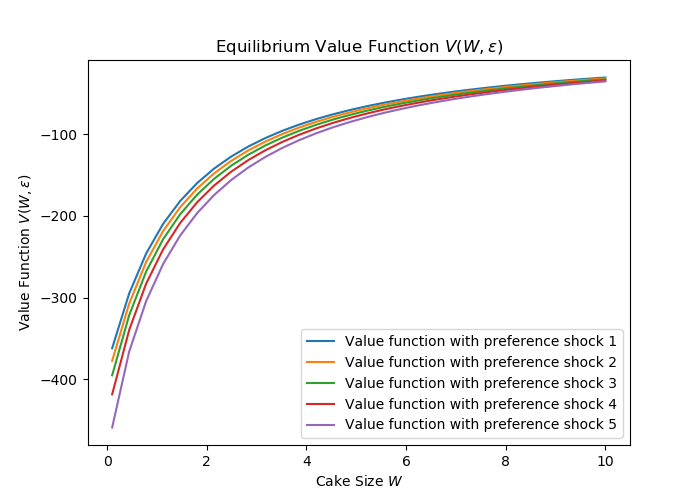

In [13]:
plt.figure(figsize=(7,5))
for i in range(5):
    plt.plot(W_vec, V_new[:,i], label='Value function with preference shock {}'.format(i+1))
plt.title('Equilibrium Value Function $V(W, \epsilon)$')
plt.xlabel('Cake Size $W$')
plt.ylabel('Value Function $V(W, \epsilon)$')
plt.legend()

#### (c)

<IPython.core.display.Javascript object>


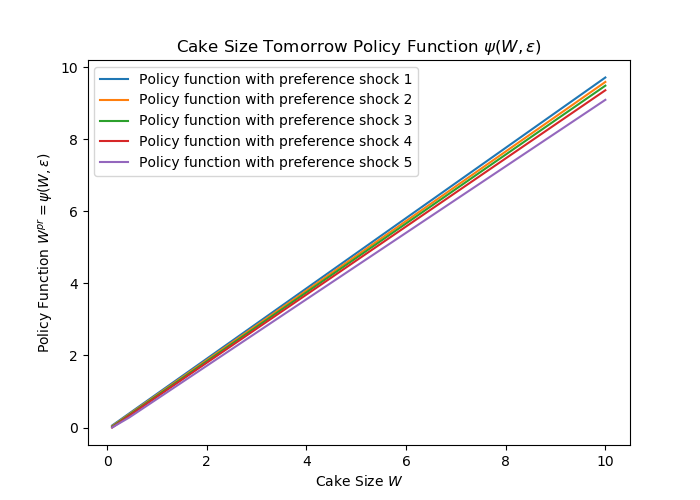

In [12]:
plt.figure(figsize=(7,5))
for i in range(5):
    plt.plot(W_vec, psi_mat[:,i], label='Policy function with preference shock {}'.format(i+1))
plt.title('Cake Size Tomorrow Policy Function $\psi(W, \epsilon)$')
plt.xlabel('Cake Size $W$')
plt.ylabel('Policy Function $W^{pr}=\psi(W, \epsilon)$')
plt.legend()